In [167]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib inline

Example of loading a dataset from the file datasets.txt:

In [168]:
datasets = open("datasets.txt","r")
datasets = datasets.read().splitlines()
# remove blank lines
for line in datasets:
    if line=='':
        datasets.remove(line)
length = str(len(datasets))
select_dataset = int(input("Please select a dataset 1 - " + length +":"))
raw_current_dataset = datasets[select_dataset-1].split(",")
raw_current_dataset.pop(len(raw_current_dataset)-1)
current_dataset = [float(val) for val in raw_current_dataset]
current_dataset

[-0.17876524796317747,
 20.0,
 -0.18921264590268683,
 24.663,
 -0.19516852685869782,
 29.337,
 -0.19925650700929848,
 34.0,
 -0.2020750588967964,
 38.663,
 -0.20450348678722682,
 43.337,
 -0.20664736466540315,
 48.0,
 -0.20791731109405098,
 52.663,
 -0.20937724324538065,
 57.337,
 -0.2102112847153193,
 62.0,
 -0.21114321918984455,
 66.663,
 -0.21189690757242524,
 71.337,
 -0.21248691055068278,
 76.0,
 -0.21301217249477822,
 80.663,
 -0.21355553856556714,
 85.337]

Split data into 2 separate lists:

In [169]:
distance, entropy = [], []
for i in range(len(current_dataset)):
    if i == 0 or i%2 == 0:
        entropy.append(current_dataset[i])
    else:
        distance.append(current_dataset[i])

Plot entropy against distance:

Text(0.5, 1.0, 'Plot of entropy against distance')

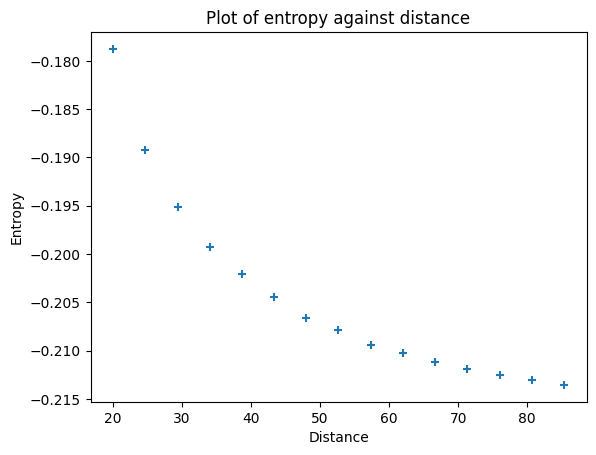

In [170]:
plt.scatter(distance,entropy,marker='+')
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Plot of entropy against distance")

Standard deviation for analysing noise data:

In [171]:
print(np.std(entropy))

0.009681186516604497


Text(0, 0.5, 'log(standard deviation)')

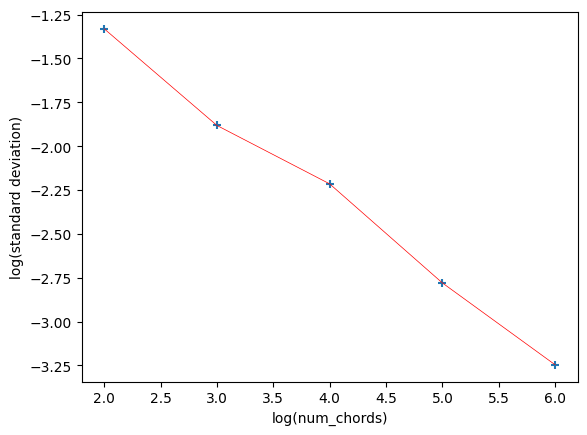

In [172]:
with open("vary_num_chords_noise.txt") as noise_data:
    noise_data_list = noise_data.read().splitlines()
noise_x,noise_y = [],[]
for val in noise_data_list:
    noise_x.append(np.log10(int(val.split(",")[1])))
    noise_y.append(np.log10(float(val.split(",")[0])))

plt.scatter(noise_x,noise_y,marker='+')
plt.plot(noise_x,noise_y,"red",linewidth=0.5)
plt.xlabel("log(num_chords)")
plt.ylabel("log(standard deviation)")

Fit a curve to the data:

In [173]:
x_values,y_values = [],[]
for i in range(0,len(current_dataset),2):
    x_values.append(current_dataset[i+1])
    y_values.append(current_dataset[i])

In [174]:
p = np.polyfit(x_values,y_values,3)
p

array([-2.53358643e-07,  5.06059030e-05, -3.47017395e-03, -1.29242736e-01])

Text(0.5, 1.0, 'Fitting a polynomial curve')

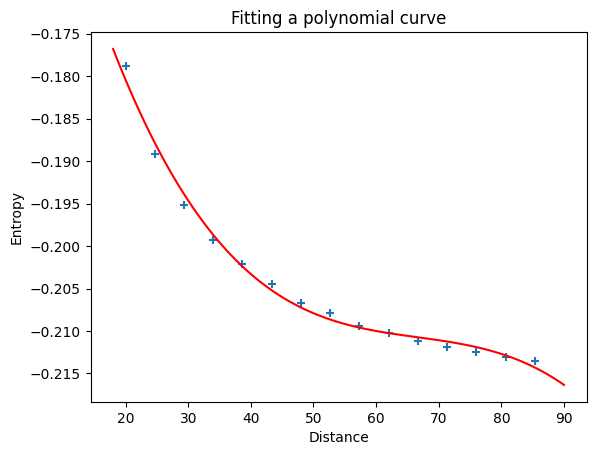

In [175]:
x = np.linspace(18,90,100)
y = (p[0] * x**3) + (p[1] * x**2) + (p[2] * x) + p[3]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y,"red")
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Fitting a polynomial curve")

In [176]:
def f(x, a, b, c):
    return (a*(x**b)) + c

p2 = scipy.optimize.curve_fit(f, xdata=x_values,ydata=y_values, p0=(0,-1,2))
p2 = p2[0]
p2

array([ 1.99357529, -1.30034836, -0.21959092])

Text(0.5, 1.0, 'Fitting an exponential curve')

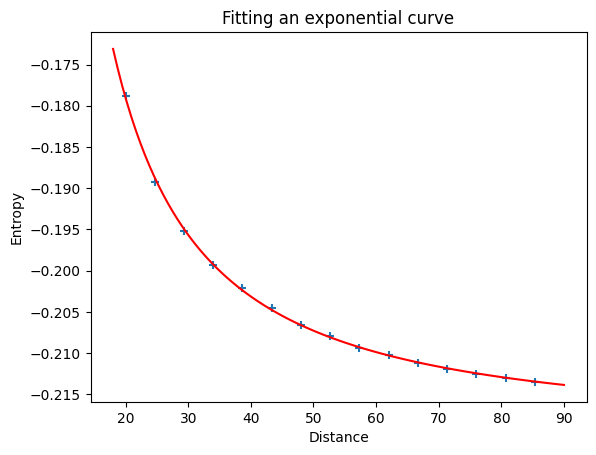

In [177]:
y2 = (p2[0] * (x**p2[1])) + p2[2]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y2,"red")
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Fitting an exponential curve")

Calculate gradient between points and plot:

In [178]:
gradient_vals = []

for i in range(len(entropy)-1):
    dS = entropy[i+1] - entropy[i]
    dx = distance[i+1] - distance[i]
    x = distance[i] + dx/2
    if dS/dx < 0:
        gradient_vals.append((dS/dx,x))

gradient_vals

[(-0.002240488513727076, 22.3315),
 (-0.001274257799745612, 27.0),
 (-0.0008766845701481153, 31.6685),
 (-0.0006044503297229065, 36.3315),
 (-0.0005195609521674008, 41.0),
 (-0.0004597636453305441, 45.6685),
 (-0.00027234536320991517, 50.3315),
 (-0.0003123517653679217, 55.0),
 (-0.0001788637079002041, 59.6685),
 (-0.00019985727525739834, 64.3315),
 (-0.00016125125857524404, 69.0),
 (-0.00012652862497480958, 73.6685),
 (-0.00011264463737839163, 78.3315),
 (-0.00011625290346361127, 83.0)]

Text(0.5, 1.0, 'Plotting dS/dx against distance(x)')

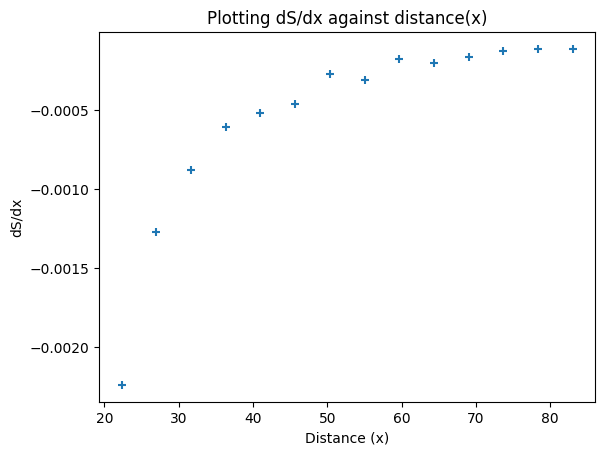

In [179]:
grad_xs, grad_ys = [],[]
for coord in gradient_vals:
    grad_ys.append(coord[0])
    grad_xs.append(coord[1])
#grad_xs.pop(0)
#grad_ys.pop(0)
plt.scatter(grad_xs,grad_ys,marker="+")
plt.xlabel("Distance (x)")
plt.ylabel("dS/dx")
plt.title("Plotting dS/dx against distance(x)")

Fit a curve to the gradient data:

a = 0.0004586023818082089 
b = -21.84719501723194 
c = -0.0019140995654889606


C:\Users\Josh\AppData\Local\Temp\ipykernel_11140\379707339.py:2: RuntimeWarning: invalid value encountered in log
  return a * np.log(x+b) + c
C:\Users\Josh\AppData\Local\Temp\ipykernel_11140\379707339.py:9: RuntimeWarning: invalid value encountered in log
  y3 = (p3[0] * np.log(x+p3[1])) + p3[2]


Text(0.5, 1.0, 'Fitting a log curve to the data')

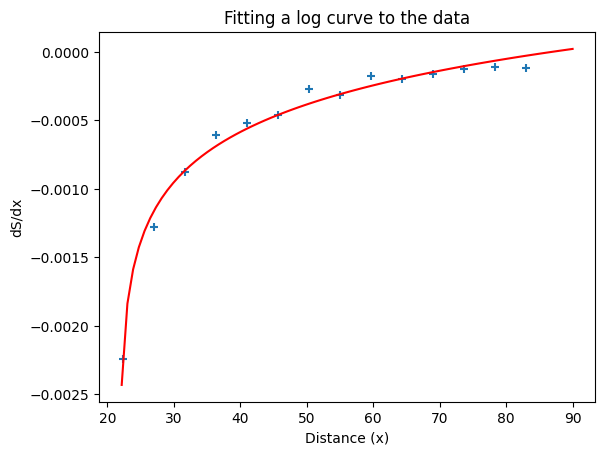

In [180]:
def f(x, a, b, c):
    return a * np.log(x+b) + c

p3 = scipy.optimize.curve_fit(f, xdata=grad_xs,ydata=grad_ys, p0=(0.001,-5,-0.005))[0]
print("a =",p3[0],"\nb =",p3[1],"\nc =",p3[2])

x = np.linspace(5,90,100)

y3 = (p3[0] * np.log(x+p3[1])) + p3[2]

plt.plot(x,y3,"red")
plt.scatter(grad_xs,grad_ys,marker="+")
plt.xlabel("Distance (x)")
plt.ylabel("dS/dx")
plt.title("Fitting a log curve to the data")

Draw a ln-ln plot of the data (should be a straight line, negative gradient):

In [181]:
neg_log_grads = []
log_xs = []

for y in grad_ys:
    neg_log_grads.append(np.log(-1 * y))
for x in grad_xs:
    log_xs.append(np.log(x))

Text(0.5, 1.0, 'ln-ln plot of data')

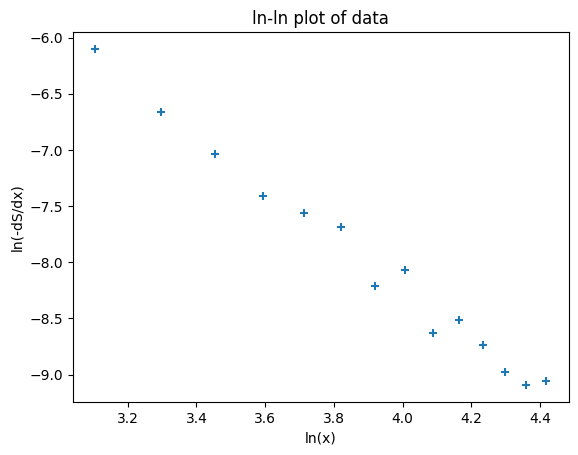

In [182]:
plt.scatter(log_xs,neg_log_grads,marker="+")
plt.xlabel("ln(x)")
plt.ylabel("ln(-dS/dx)")
plt.title("ln-ln plot of data")

In [183]:
# could remove outliers here
#neg_log_grads.pop()
#log_xs.pop()

p4 = np.polyfit(log_xs,neg_log_grads,1)
p4

array([-2.26629027,  0.83652885])

Text(0.5, 1.0, 'Plotting linear LOBF')

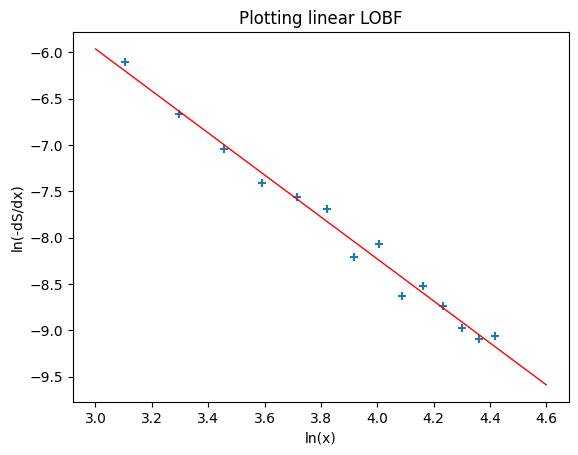

In [184]:
x = np.linspace(3.0,4.6,100)
y = p4[0] * x + p4[1]

plt.scatter(log_xs,neg_log_grads,marker="+")
plt.plot(x,y,"red",linewidth=1)
plt.xlabel("ln(x)")
plt.ylabel("ln(-dS/dx)")
plt.title("Plotting linear LOBF")

In [185]:
print("The gradient of the ln-ln plot is %s"%round(p4[0],9))

The gradient of the ln-ln plot is -2.266290271


Plot relationship between number of chords and time taken to generate:

Text(0.5, 1.0, 'Log-log relationship between num_chords and time to simulate')

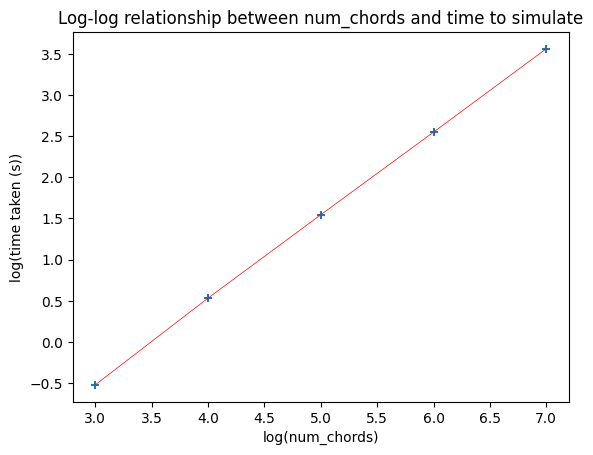

In [186]:
with open("vary_num_chords.txt") as chords_data:
    chords_data_list = chords_data.read().splitlines()
chords_x,chords_y = [],[]
for val in chords_data_list:
    chords_x.append(np.log10(int(val.split(",")[0])))
    chords_y.append(np.log10(float(val.split(",")[1])))

plt.scatter(chords_x,chords_y,marker="+")
plt.plot(chords_x,chords_y,"red",linewidth=0.5)
plt.xlabel("log(num_chords)")
plt.ylabel("log(time taken (s))")
plt.title("Log-log relationship between num_chords and time to simulate")

# Ideas:

Remove outliers from gradient graph and try again

Graph the mathematical derivative of the curve fit values and compare